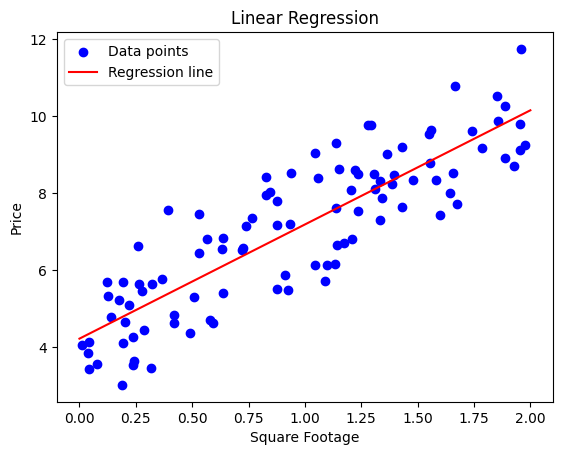

Mean Squared Error: 0.9924386487246479


In [ ]:
# Linear Regression with Single Feature

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generating synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Creating and fitting the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predicting
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_predict = lin_reg.predict(X_new)

# Visualizing
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_predict, color='red', label='Regression line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Evaluating the model
y_pred = lin_reg.predict(X)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


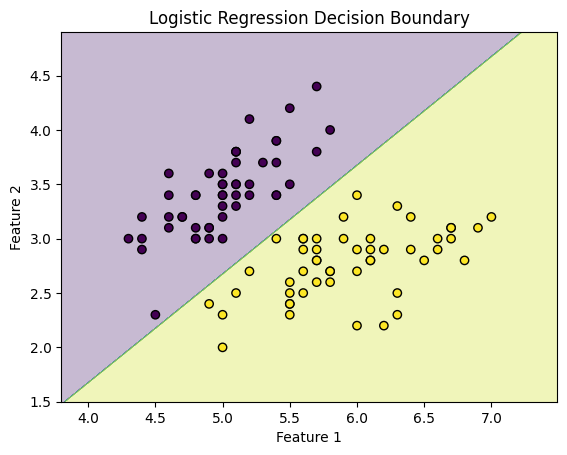

In [ ]:
# Logistic Regression for Binary Classification

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
iris = load_iris()
X = iris.data[iris.target != 2, :2]  # Only first two features and two classes
y = iris.target[iris.target != 2]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and fit model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Visualizing decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [ ]:
# K-Nearest Neighbors (KNN) Classification

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train and evaluate KNN with different k values
for k in [1, 3, 5, 7]:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'K={k} - Accuracy: {accuracy}')

K=1 - Accuracy: 0.9777777777777777
K=3 - Accuracy: 0.9777777777777777
K=5 - Accuracy: 0.9777777777777777
K=7 - Accuracy: 0.9777777777777777


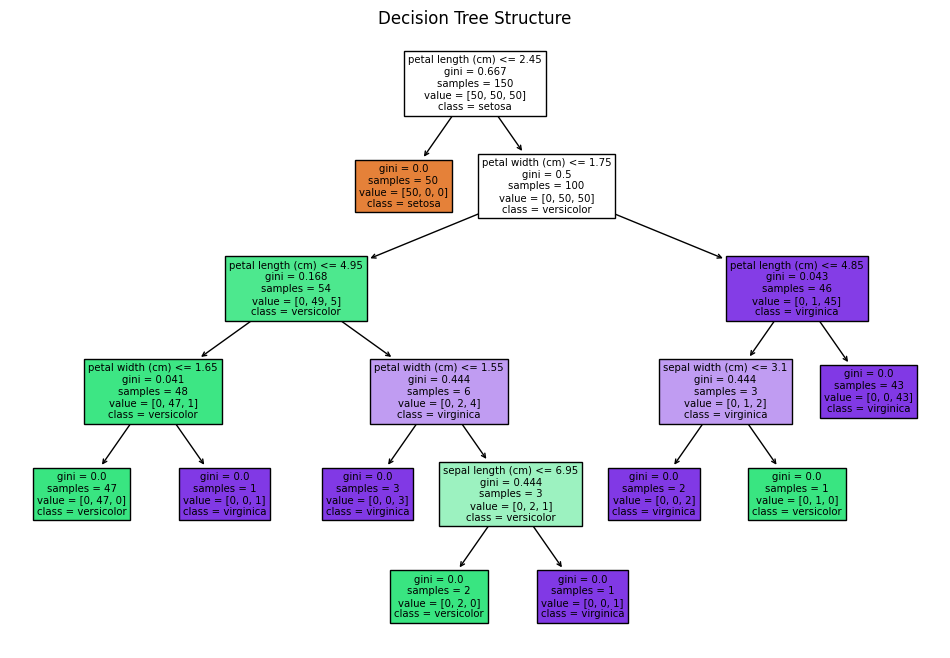

Feature: sepal length (cm), Importance: 0.013333333333333332
Feature: sepal width (cm), Importance: 0.013333333333333332
Feature: petal length (cm), Importance: 0.5507226247987118
Feature: petal width (cm), Importance: 0.42261070853462157


In [ ]:
# Decision Tree Classification

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create and fit model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Decision Tree Structure')
plt.show()

# Analyze feature importance
importances = tree_clf.feature_importances_
for feature, importance in zip(iris.feature_names, importances):
    print(f'Feature: {feature}, Importance: {importance}')

In [ ]:
# Naive Bayes Classification

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (using 20 newsgroups for simplicity)
categories = ['soc.religion.christian', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)
X = newsgroups.data
y = newsgroups.target

# Preprocess text data
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=0)

# Create and fit model
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 0.9782244556113903
Classification Report:
                        precision    recall  f1-score   support

               sci.med       0.98      0.97      0.98       270
soc.religion.christian       0.97      0.99      0.98       327

              accuracy                           0.98       597
             macro avg       0.98      0.98      0.98       597
          weighted avg       0.98      0.98      0.98       597



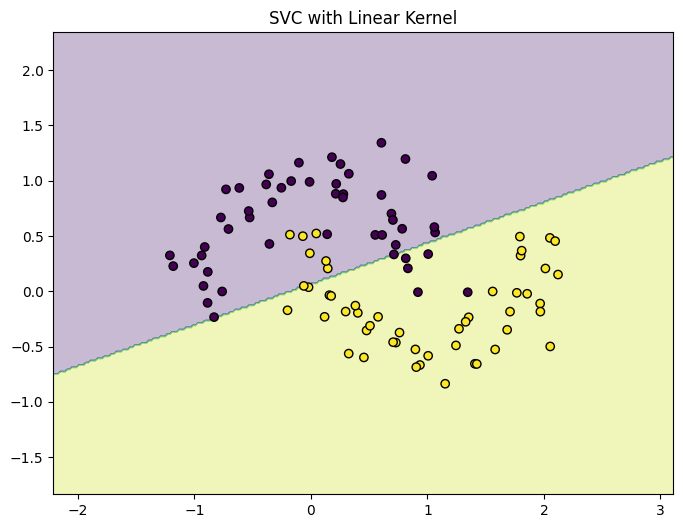

In [ ]:
# Support Vector Machines (SVM) with Kernel Trick

from sklearn.datasets import make_moons
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Generate non-linearly separable data
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    plt.figure(figsize=(8,6))
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Linear Kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X, y)
plot_decision_boundary(svc_linear, X, y, 'SVC with Linear Kernel')